# Resampling

In statistics, resampling is any of a variety of methods for doing one of the following:

- Estimating the precision of sample statistics (medians, variances, percentiles) by using subsets of available data (**jackknifing**) or drawing randomly with replacement from a set of data points (**bootstrapping**)
- Exchanging labels on data points when performing significance tests (**permutation tests**, also called exact tests, randomization tests, or re-randomization tests)
- Validating models by using random subsets (**bootstrapping**, **cross validation**)

------------

# Cross Validation

Cross-validation, sometimes called rotation estimation, is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (testing dataset).

The goal of cross validation is to define a dataset to "test" the model in the training phase (i.e., the validation dataset), in order to limit problems like overfitting, give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem), etc.

## Exercise 1 - Explore the mtcars data set from the ggplot package

In [2]:
from ggplot import mtcars
mtcars.head()

## Exercise 2 - Build a Cross Validation class 

It should do the following:
- Hold-Out, LOOCV and k-Fold
- Take in specific parameters for each
- Return train and test sets
- Start out with 1 dimension / feature
- *Optional* - Build for more dimensions / features

In [61]:
from random import seed, randrange
class CrossValidation():
    def __intit__(self):
        pass
    
    def hold_out (self, data, split=.60):
        train = list(data)
        test = list()
        train_size = split*len(data)
        
        while len(train)> train_size:
            index = randrange(len(train))
            test.append(train.pop(index))
            
        return train, test    

    def loocv(self, data):
        train = list(data)
        test = list()

        index = randrange(len(train))
        test.append(train.pop(index))
        
        return train, test            
    
    def k_fold (self, data, folds=3):
        data_split = list()
        data_copy = list(data)
        fold_size = len(data)//folds
        
        for i in range(folds):
            fold = list()
            while len(fold) < fold_size:
                index= randrange(len(data_copy))
                fold.append(data_copy.pop(index))
                
            data_split.append(fold)

        return data_split            
        

## Execise 3 - Try it out on the mtcars data set

In [10]:
x= list(mtcars['mpg'])
len(x)

32

In [62]:
cv = CrossValidation()

In [19]:
train, test = cv.hold_out(x)
print("hold out method: ")
print("length of training" , len(train))
print("length of testing: ", len(test))


hold out method: 
length of training 19
length of testing:  13


In [20]:
train, test = cv.loocv(x)
print("hold out method: ")
print("length of training" , len(train))
print("length of testing: ", len(test))

hold out method: 
length of training 31
length of testing:  1


In [64]:
folds = cv.k_fold(x)

for i in range(len(folds)):
    print("Fold {}: {}".format(i+1, folds[i]))
    print("\n")    

Fold 1: [10.4, 13.300000000000001, 22.800000000000001, 15.199999999999999, 27.300000000000001, 16.399999999999999, 30.399999999999999, 22.800000000000001, 17.300000000000001, 17.800000000000001]


Fold 2: [15.0, 10.4, 19.699999999999999, 21.5, 19.199999999999999, 14.300000000000001, 21.0, 18.699999999999999, 15.5, 15.800000000000001]


Fold 3: [26.0, 18.100000000000001, 19.199999999999999, 24.399999999999999, 14.699999999999999, 21.399999999999999, 33.899999999999999, 21.399999999999999, 30.399999999999999, 21.0]




## Exercise 4 - Check via Scikit-Learn

In [66]:
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold

In [68]:
X_train, X_test, _, _ = train_test_split(mtcars['mpg'], mtcars['hp'], test_size = .4)
print("length of training" , len(X_train))
print("length of testing: ", len(X_test))

length of training 19
length of testing:  13


In [73]:
X= mtcars['mpg']
loo= LeaveOneOut()

for train_index, test_index in loo.split(X):
    print("Train: ", train_index, "Test: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    print(X_train,X_test)

Train:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31] Test:  [0]
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64 0    21.0
Name: mpg, dtype: float64
Train:  [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31] Test:  [1]
0     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64 

In [76]:
X= mtcars['mpg']
xf = KFold(n_splits=3)


for train_index, test_index in xf.split(X):
    print("Train: ", train_index, "Test: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    print(X_train,X_test)

Train:  [11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31] Test:  [ 0  1  2  3  4  5  6  7  8  9 10]
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64 0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
Name: mpg, dtype: float64
Train:  [ 0  1  2  3  4  5  6  7  8  9 10 22 23 24 25 26 27 28 29 30 31] Test:  [11 12 13 14 15 16 17 18 19 20 21]
0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64 11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5

------------

# Bootstrapping

Bootstrapping is a statistical method for estimating the sampling distribution of an estimator by sampling with replacement from the original sample, most often with the purpose of deriving robust estimates of standard errors and confidence intervals of a population parameter like a mean, median, proportion, odds ratio, correlation coefficient or regression coefficient.

## Exercise 1 - Build a Bootstrap Class 

It should do the following:
- Take in the appropriate parameters
- Calculate various common statistics of interest
    - Example. For the mean or median, calculate the standard deviation to estimate the standard error, the 2.5th and 97.5th percentiles as a confiendence interval, and draw a histogram of the distribution

In [86]:
from random import seed, randrange
from statistics import stdev, mean, median, mode, variance
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

class Bootstrap():
    def __init__(self, samples = 100, ratio= 1):
        self.samples = samples
        self.ratio = ratio
        
    def aggregation(self, data):
        sample_list = list()
        for i in range(self.samples):
            sample= list()
            n_sample = round(len(data)* self.ratio)
            
            while len(sample) < n_sample:
                index = randrange(len(data))
                sample.append(data[index])
                
            sample_list.append(sample)
        return sample_list

    def percentile(self,data, percentile):
        size = len(data)
        return sorted(data)[int(math.ceil((size*percentile)/100 ))-1]

    def plot(self,samples, statistic, error):
        n, bins, patches = plt.hist(samples, 10, normed=.75, facecolor ="green", alpha = .75)
        
        y= mlab.normpdf(bins, statistic, error)
        l= plt.plot(bins, y, "r--",linewidth=1)
        
        plt.xlabel("Bootstrap Estimation")
        plt.ylabel("Num of Samples / Prob Density")        
        plt.title("Hist / PDF")
        plt.grid(True)
        plt.show()
        

    def summary(self, samples, statistic, error):
        print("Samples {}, Estimate {}".format(len(samples), statistic))
        print("Samples {}, Standard Error {}".format(len(samples), error))
        print("Samples {}, 2.5% {}".format(len(samples), self.percentile(samples, 2.5)))
        print("Samples {}, 97.5% {}".format(len(samples), self.percentile(samples, 97.5)))
        
    def median(self, data):
        sample_medians = list()
        sample_list = self.aggregation(data)
        
        for sample in sample_list:
            sample_median = median(sample)
            sample_medians.append(sample_median)
            
        estimated_median = mean(sample_medians)    
        standard_error = stdev(sample_medians)
        
        self.summary(sample_medians,estimated_median, standard_error)
        self.plot(sample_medians,estimated_median, standard_error)                        

## Exercise 2 - Try it out on the mtcars data set

Samples 100, Estimate 19.2255
Samples 100, Standard Error 1.2052598319973424
Samples 100, 2.5% 16.85
Samples 100, 97.5% 21.4


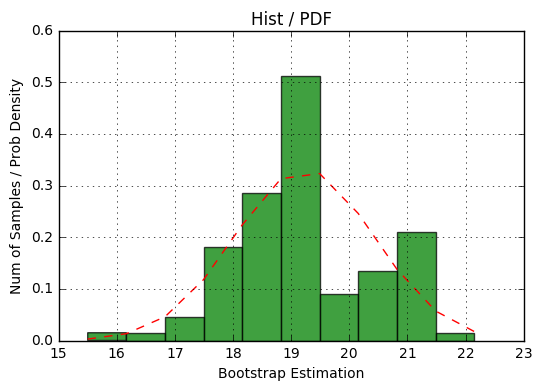

In [87]:
bs = Bootstrap()
bs.median(mtcars['mpg'])

## Exercise 3 - Check via scikits.bootstrap or NumPy

*Scikit-learn has deprecated and removed the bootstrap class for no logical reason.*

In [89]:
import numpy as np

x= mtcars['mpg']
n=len(x)
reps= 100
xb= np.random.choice(x, (n, reps))
mb = np.median(xb, axis= 0)

np.percentile(mb, [2.5, 97.5])

array([ 16.6925 ,  21.32875])